In [22]:
import numpy as np
import matplotlib.pyplot as plt
import math
import HammingCode
import Utils

from scipy.special import erfc

# número de bits da amostra a ser corrompida
sample_length = 2 ** 8
noise_samples_length = 10^3
variancia = 1
sample = np.random.choice([1, 0], size=sample_length);

#sample = Utils.generate_random_string(sample_length)

# array com as taxas de ruído indo de 0 à 100%
#noise_rates = np.linspace(0, 1, 1001)
noise_rates = np.random.normal(0, np.sqrt(variancia/2), size=int(noise_samples_length))

In [15]:
def decode_sample(data):
    decoded_data = []
    for i in range(0, len(data) - 6, 7):
        decoded_data.extend(HammingCode.decode(data[i:i + 7]).T)
    return decoded_data

def encode_sample(data):
    encoded_data = []
    for i in range(0, len(data) - 3, 4):
        encoded_data.extend(HammingCode.encode(data[i:i + 4]))
    return encoded_data

In [25]:
#  generate encoded sampels
encoded_sample = encode_sample(sample)
Eb_dB_values = np.arange(-2, 11, 1)

# adciona ruído às amostras
noisy_samples = []
for rate in noise_rates:
    noisy_samples.append(Utils.noiseString(rate, encoded_sample))

decoded_samples = []
ber_values = []
snr_values = []

for noisy_sample in noisy_samples:
    decoded_samples.append(decode_sample(noisy_sample))
    ber, snr = Utils.calculateRecall(sample, decoded_samples[-1])
    ber_values.append(ber)
    snr_values.append(snr)

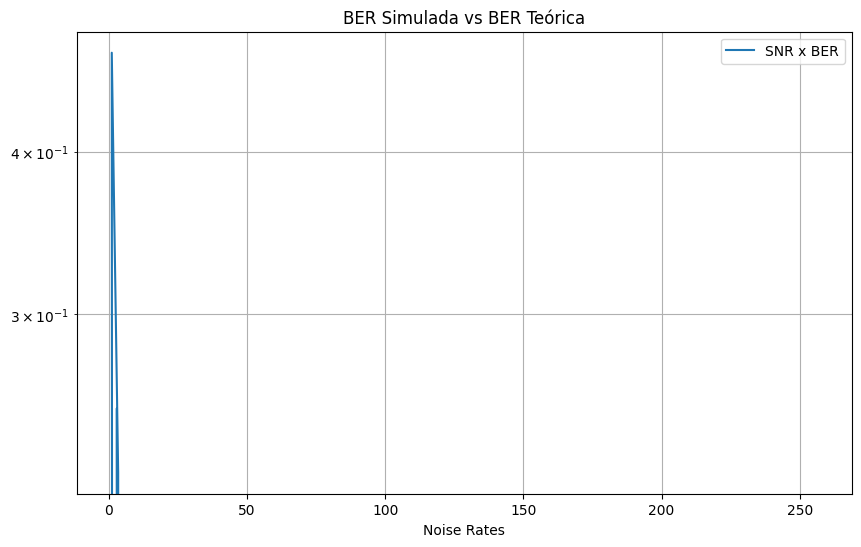

In [24]:
# Plotar as taxas de erro de bit simuladas e teóricas
plt.figure(figsize=(10, 6))
#plt.semilogy(noise_rates, ber_values, label='BER x nois rates')
#plt.semilogy(noise_rates, snr_values, label='SNR x noise rates')
plt.semilogy(snr_values, ber_values, label='SNR x BER')
plt.xlabel('Noise Rates')
plt.grid(True, which='both')
plt.legend()
plt.title('BER Simulada vs BER Teórica')
plt.show()

In [8]:
Eb_dB_values = np.arange(0, 10, 0.01)
BER_simulada = noise_rates*sample_length

# Calcular a BER simulada para cada valor de Eb
for Eb_dB in Eb_dB_values:
    np.append(BER_simulada, Utils.calcular_BER_simulada(Eb_dB))

# Converter a lista BER_simulada em array numpy
BER_simulada = np.array(BER_simulada)

# Calcular a BER teórica
Eb_values = 10 ** (Eb_dB_values / 10)


BER_teorica = 0.5 * erfc(np.sqrt(Eb_values))

# Imprimir as taxas de erro de bit teóricas
# for i, Eb_dB in enumerate(Eb_dB_values):
#    print(f'BER Teórica para Eb/No de {Eb_dB} dB:', BER_teorica[i])

# Plotar as taxas de erro de bit simuladas e teóricas
plt.figure(figsize=(10, 6))
plt.semilogy(Eb_dB_values, BER_simulada, marker='o', label='BER Simulada')
plt.semilogy(Eb_dB_values, BER_teorica, linestyle='--', label='BER Teórica')
plt.xlabel('Eb/No (dB)')
plt.ylabel('BER')
plt.grid(True, which='both')
plt.legend()
plt.title('BER Simulada vs BER Teórica')
plt.show()

KeyboardInterrupt: 